In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/MyDrive/upload anything/

/content/drive/MyDrive/upload anything


In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
seed = 31
keras.utils.set_random_seed(seed)

In [7]:
# NUM_CLASSES = 6
image_size = 128
input_shape = (image_size, image_size, 3)

In [8]:
def create_data_label(disease_type, idx):
    for i in disease_type:   
        img=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size= (image_size, image_size))
        img=np.array(img)
        data.append(img)
        labels.append(idx)

In [9]:
import glob
import numpy as np

c1 = glob.glob('data/Grape__black_measles/*.*')
c2 = glob.glob('data/Grape__black_rot/*.*')
c3 = glob.glob('data/Grape__healthy/*.*')
c4 = glob.glob('data/Grape__leaf_blight_(isariopsis_leaf_spot)/*.*')
c5 = glob.glob('data/Pepper_bell__bacterial_spot/*.*')
c6 = glob.glob('data/Pepper_bell__healthy/*.*')

classes = [c1, c2, c3, c4, c5, c6]

In [10]:
total_images = len(c1)+len(c2)+len(c3)+len(c4)+len(c5)+len(c6)
print(f"Total images: {total_images}\n")

itr = 1
for i in classes:
    var = 'c' + str(itr)
    print(f'Images in {var}: {len(i)} and percentage: {len(i) / total_images}')
    itr += 1

Total images: 6635

Images in c1: 1383 and percentage: 0.20844009042954031
Images in c2: 1287 and percentage: 0.19397136397889977
Images in c3: 470 and percentage: 0.07083647324792766
Images in c4: 889 and percentage: 0.1339864355689525
Images in c5: 1067 and percentage: 0.16081386586284854
Images in c6: 1539 and percentage: 0.2319517709118312


In [11]:
data = []
labels = []

for i in range(len(classes)):
    create_data_label(classes[i], i)

data = np.array(data)
labels = np.array(labels)

In [12]:
data = data/255.

In [13]:
data

array([[[[0.81568627, 0.8       , 0.79607843],
         [0.81960784, 0.80392157, 0.8       ],
         [0.82745098, 0.81176471, 0.80784314],
         ...,
         [0.63529412, 0.58039216, 0.58039216],
         [0.64705882, 0.59215686, 0.59215686],
         [0.58823529, 0.53333333, 0.53333333]],

        [[0.83137255, 0.81568627, 0.81176471],
         [0.83137255, 0.81568627, 0.81176471],
         [0.82745098, 0.81176471, 0.80784314],
         ...,
         [0.61960784, 0.56470588, 0.56470588],
         [0.61960784, 0.56470588, 0.56470588],
         [0.57647059, 0.52156863, 0.52156863]],

        [[0.81960784, 0.80392157, 0.8       ],
         [0.84313725, 0.82745098, 0.82352941],
         [0.84705882, 0.83137255, 0.82745098],
         ...,
         [0.61568627, 0.56078431, 0.56078431],
         [0.62352941, 0.56862745, 0.56862745],
         [0.61568627, 0.56078431, 0.56078431]],

        ...,

        [[0.71372549, 0.67058824, 0.68627451],
         [0.70588235, 0.6627451 , 0.67843137]

In [14]:
from sklearn.model_selection import train_test_split

#split the final dataset into train and test with 80:20
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=31)
#split the train dataset further into train and validation with 80:20
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=31)

print(f"x_train shape: {x_train.shape}") 
print(f"y_train shape: {y_train.shape}\n")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}\n")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (4246, 128, 128, 3)
y_train shape: (4246,)

x_val shape: (1062, 128, 128, 3)
y_val shape: (1062,)

x_test shape: (1327, 128, 128, 3)
y_test shape: (1327,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [16]:
model = Sequential()

model.add(Conv2D(64, (2,2), activation='relu', kernel_initializer='he_normal', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(128, (2,2), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(6, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 64)      832       
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 128)       32896     
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 128)      512       
 hNormalization)                                                 
                                                        

In [19]:
from keras.callbacks import History
history = History()

In [20]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=32, callbacks=[history])

Epoch 1/30
133/133 [==============================] - 28s 78ms/step - loss: 2.7862 - accuracy: 0.7918 - val_loss: 4.2914 - val_accuracy: 0.1846
Epoch 2/30
133/133 [==============================] - 8s 62ms/step - loss: 1.3624 - accuracy: 0.9173 - val_loss: 3.9556 - val_accuracy: 0.1450
Epoch 3/30
133/133 [==============================] - 8s 60ms/step - loss: 0.7632 - accuracy: 0.9520 - val_loss: 3.0471 - val_accuracy: 0.2533
Epoch 4/30
133/133 [==============================] - 8s 63ms/step - loss: 0.4604 - accuracy: 0.9710 - val_loss: 0.5822 - val_accuracy: 0.8974
Epoch 5/30
133/133 [==============================] - 8s 61ms/step - loss: 0.3069 - accuracy: 0.9772 - val_loss: 0.4914 - val_accuracy: 0.9011
Epoch 6/30
133/133 [==============================] - 8s 63ms/step - loss: 0.2408 - accuracy: 0.9739 - val_loss: 0.2496 - val_accuracy: 0.9633
Epoch 7/30
133/133 [==============================] - 8s 64ms/step - loss: 0.1781 - accuracy: 0.9812 - val_loss: 0.2274 - val_accuracy: 0.959

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


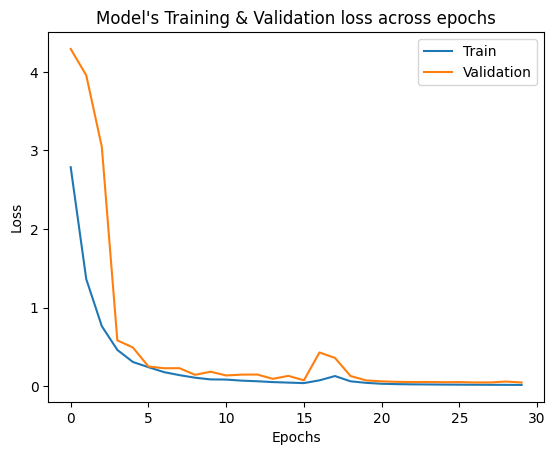

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

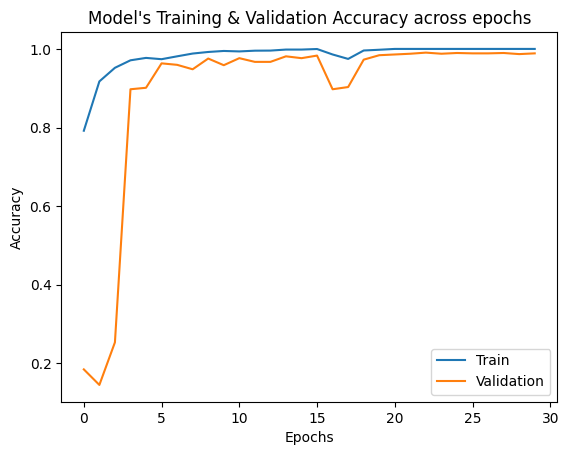

In [23]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [24]:
result = model.evaluate(x_test, y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":", str(round(result[i],2)))

42/42 [==============================] - 1s 26ms/step - loss: 0.0664 - accuracy: 0.9812
Metric  loss : 0.07
Metric  accuracy : 0.98


In [25]:
! pip install visualkeras
! pip install ImageFont


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ImageFont (from versions: none)
ERROR: No matching distribution found for ImageFont


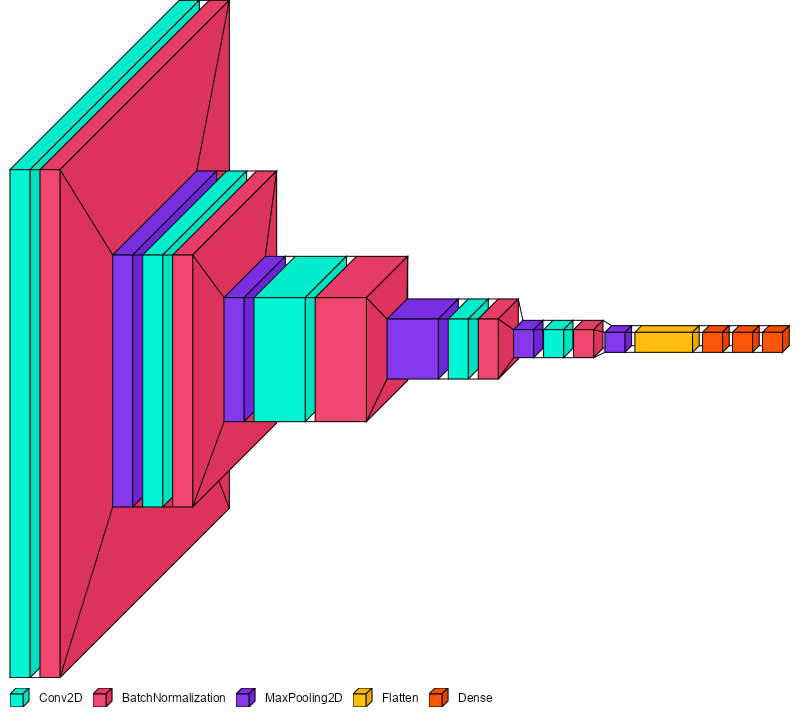

In [26]:
# import visualkeras
import visualkeras
from tensorflow.keras import layers
from collections import defaultdict
from PIL import ImageFont

font = ImageFont.truetype("font/arial.ttf", 12) # for google colab
color_map = defaultdict(dict)
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)

In [27]:
y_test_reshaped = y_test.reshape(-1, )
y_test_reshaped[:5]

array([5, 0, 5, 1, 1])

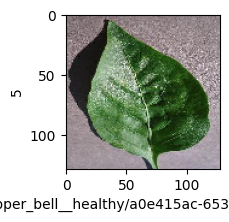

In [28]:
def plot_sample(x, y, idx):
    plt.figure(figsize=(15, 2))
    plt.imshow(x[idx])
    plt.xlabel(classes[y[idx]])
    plt.ylabel(y_test_reshaped[idx])

plot_sample(x_test, y_test_reshaped, 109)    

In [29]:
y_pred = model.predict(x_test)

42/42 [==============================] - 1s 17ms/step


In [30]:
y_pred[:5] # values in array are the probabilistic dist b/w 0 and 1 and i wanna find out the max

array([[1.5243253e-04, 6.6055713e-05, 4.0674518e-04, 9.4579387e-05,
        4.3601284e-04, 9.9884415e-01],
       [9.9993813e-01, 1.5882059e-05, 2.9562889e-06, 1.1209924e-05,
        1.9999732e-05, 1.1832544e-05],
       [1.3442439e-05, 5.5435635e-06, 2.5709634e-05, 7.4328295e-06,
        6.1604725e-05, 9.9988627e-01],
       [1.5786971e-04, 9.9953079e-01, 8.9113149e-05, 5.4625427e-05,
        1.4657329e-04, 2.1078724e-05],
       [4.4540444e-05, 9.9988329e-01, 1.8048524e-05, 1.3580441e-05,
        3.7344344e-05, 3.2374380e-06]], dtype=float32)

In [31]:
np.argmax(y_pred[1])

0

In [32]:
y_classes = [np.argmax(elem) for elem in y_pred]

In [33]:
print(y_test[:10])
print(y_pred[:10])

[5 0 5 1 1 2 4 0 5 4]
[[1.52432534e-04 6.60557125e-05 4.06745181e-04 9.45793872e-05
  4.36012837e-04 9.98844147e-01]
 [9.99938130e-01 1.58820585e-05 2.95628888e-06 1.12099242e-05
  1.99997321e-05 1.18325443e-05]
 [1.34424390e-05 5.54356347e-06 2.57096344e-05 7.43282953e-06
  6.16047255e-05 9.99886274e-01]
 [1.57869712e-04 9.99530792e-01 8.91131494e-05 5.46254269e-05
  1.46573293e-04 2.10787239e-05]
 [4.45404439e-05 9.99883294e-01 1.80485240e-05 1.35804412e-05
  3.73443436e-05 3.23743802e-06]
 [1.17182506e-04 2.33669925e-04 9.99090433e-01 2.74655147e-04
  9.87985622e-05 1.85197670e-04]
 [3.53305135e-04 2.43299641e-04 5.57194398e-05 1.59820367e-04
  9.98697877e-01 4.89960599e-04]
 [9.99879360e-01 2.75447364e-05 6.59378065e-06 2.43351205e-05
  3.60371087e-05 2.61303157e-05]
 [2.73672194e-05 1.11405088e-05 5.07220029e-05 1.48492036e-05
  9.05407433e-05 9.99805391e-01]
 [9.60990204e-04 1.39168592e-03 4.77189780e-04 8.27478711e-03
  9.87181664e-01 1.71365275e-03]]


In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_classes)
num_images_per_class = cm.sum(axis=1)
correct_predictions_per_class = np.diag(cm)
classwise_accuracy = correct_predictions_per_class / num_images_per_class
for i in range(len(classes)):
    cls = classes[i][0].split("/")[1]
    print(f"Accuracy for class {cls}: {classwise_accuracy[i]:.2f}")

Accuracy for class Grape__black_measles: 1.00
Accuracy for class Grape__black_rot: 0.99
Accuracy for class Grape__healthy: 0.91
Accuracy for class Grape__leaf_blight_(isariopsis_leaf_spot): 1.00
Accuracy for class Pepper_bell__bacterial_spot: 0.98
Accuracy for class Pepper_bell__healthy: 0.97


<Axes: >

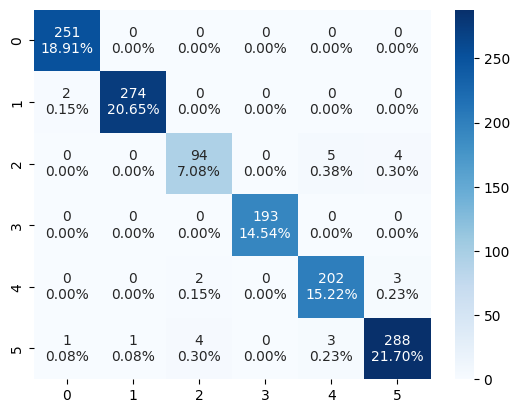

In [35]:
import seaborn as sns 

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

# Creating labels using both the group_counts and group_percentange 
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]

# Reshaping the label into a 6 x 6 matrix as there are 6 classes 
labels = np.asarray(labels).reshape(6,6)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [36]:
from sklearn.metrics import classification_report 

print("Classification report\n", classification_report(y_test, y_classes))

Classification report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       251
           1       1.00      0.99      0.99       276
           2       0.94      0.91      0.93       103
           3       1.00      1.00      1.00       193
           4       0.96      0.98      0.97       207
           5       0.98      0.97      0.97       297

    accuracy                           0.98      1327
   macro avg       0.98      0.98      0.98      1327
weighted avg       0.98      0.98      0.98      1327



In [37]:
# 1.00
# 1.00
# 0.92
# 1.00
# 0.98
# 1.00